# Importing libraries

In [1]:
# pandas
import pandas as pd


# array/ math
import numpy as np

# plotting
import matplotlib.pyplot as plt
import seaborn as sns

# feature tuning
from category_encoders import CountEncoder

Dataset downloaded from kaggle link [here](https://www.kaggle.com/datasets/shrutipandit707/onlineretaildata)

Description of the dataset
-----------
This is an online retail dataset that can be used for frequency,recency and monetary analysis and for applying clustering algorithms such as K-Means. It's a great dataset for practicing Clustering Algorithms.

# Importing data and EDA

In [2]:
df = pd.read_csv('Online_Retail.csv')

In [3]:
# check few rows
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,1/12/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,1/12/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,1/12/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,1/12/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,1/12/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
# data types of each features
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

## Duplicate row

In [5]:
100 * df[df.duplicated()].shape[0]/df.shape[0]

0.9721189350979592

0.97% training examples are duplicate row

* Question : Should the duplicate data be removed to run clustering algorithm? (Asked in [Stack](https://stats.stackexchange.com/questions/152808/do-i-need-to-remove-duplicate-objects-for-cluster-analysis-of-objects))

* Answer
    * "Having duplicates indicate that those are particularly likely combinations of variable values, which should get a higher weight because of that. This means observations with the same values do not become redundant."
    * If your data set has lots of duplicates, it can accelerate the processing a lot to merge them and use weights instead.

## Missing values

In [6]:
# which features has missing values() 
df.isna().any()

InvoiceNo      False
StockCode      False
Description     True
Quantity       False
InvoiceDate    False
UnitPrice      False
CustomerID      True
Country        False
dtype: bool

In [7]:
df["Description"].isna().sum()/df.shape[0], df["CustomerID"].isna().sum()/df.shape[0]

(2.683107311375157e-03, 0.249266943342886)

"Description"(0.27%) and "CustomerID" (24.9%) columns has missing entry

(array([    0.,  8422., 17466., 17400., 16638., 13128., 13076., 11802.,
        20045., 15977., 19067., 21529., 19575., 14810., 14706., 16493.,
        12885., 14759., 13682., 11599., 18294., 15983., 14757., 14764.,
        17690., 19320., 12962.,     0.,     0.,     0.]),
 array([12000.        , 12233.33333333, 12466.66666667, 12700.        ,
        12933.33333333, 13166.66666667, 13400.        , 13633.33333333,
        13866.66666667, 14100.        , 14333.33333333, 14566.66666667,
        14800.        , 15033.33333333, 15266.66666667, 15500.        ,
        15733.33333333, 15966.66666667, 16200.        , 16433.33333333,
        16666.66666667, 16900.        , 17133.33333333, 17366.66666667,
        17600.        , 17833.33333333, 18066.66666667, 18300.        ,
        18533.33333333, 18766.66666667, 19000.        ]),
 <BarContainer object of 30 artists>)

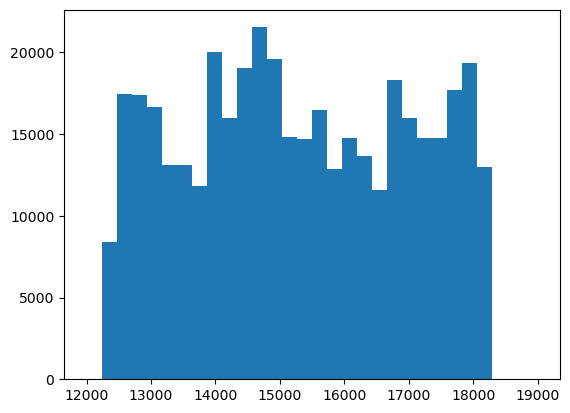

In [20]:
plt.hist(df['CustomerID'].to_numpy(), bins=30, range=(12000, 19000))
#plt.show()

* Question: What imputing strategy should we take for customerID?
* Answer: Check the correlation between customerID and invoice no or other features, Might be this is a redundant feature and we can get rid of this easily


## Encoding the categorical features

### Stock code

In [8]:
len(df['StockCode'].value_counts())

4070

"StockCode" has very high cardinality

In [9]:
# How much fraction top n category"?
df['StockCode'].value_counts().sort_values(ascending=False).head(100).sum()/df.shape[0]

0.1882419372994359

Very high cardinality, will use frequency encoding

In [10]:
CountEncoder(cols=['StockCode']).fit(df).transform(df).head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,2313,WHITE HANGING HEART T-LIGHT HOLDER,6,1/12/2010 8:26,2.55,17850.0,United Kingdom
1,536365,355,WHITE METAL LANTERN,6,1/12/2010 8:26,3.39,17850.0,United Kingdom
2,536365,296,CREAM CUPID HEARTS COAT HANGER,8,1/12/2010 8:26,2.75,17850.0,United Kingdom
3,536365,474,KNITTED UNION FLAG HOT WATER BOTTLE,6,1/12/2010 8:26,3.39,17850.0,United Kingdom
4,536365,452,RED WOOLLY HOTTIE WHITE HEART.,6,1/12/2010 8:26,3.39,17850.0,United Kingdom
5,536365,389,SET 7 BABUSHKA NESTING BOXES,2,1/12/2010 8:26,7.65,17850.0,United Kingdom
6,536365,141,GLASS STAR FROSTED T-LIGHT HOLDER,6,1/12/2010 8:26,4.25,17850.0,United Kingdom
7,536366,516,HAND WARMER UNION JACK,6,1/12/2010 8:28,1.85,17850.0,United Kingdom
8,536366,415,HAND WARMER RED POLKA DOT,6,1/12/2010 8:28,1.85,17850.0,United Kingdom
9,536367,1502,ASSORTED COLOUR BIRD ORNAMENT,32,1/12/2010 8:34,1.69,13047.0,United Kingdom


### Country

In [11]:
df['Country'].value_counts().head(5)

United Kingdom    495478
Germany             9495
France              8557
EIRE                8196
Spain               2533
Name: Country, dtype: int64

Question: Any special techniques to encode country name for clustering algorithm? Say for example if we perform label encoding then some information like common habit amonst subcontinent information may be lost. So coordinate can be used!

`Do One hot encoding`

### Invoice date

Use Cyclical transformer or other similar techniques to transform datetime. 

References:
* [Search Engine](https://www.google.com/search?q=how+to+encode+data+time+in+machine+learning&oq=how+to+encode+data+time+in+mach&aqs=chrome.1.69i57j33i160j33i21l2j33i22i29i30l6.9079j0j7&sourceid=chrome&ie=UTF-8)
* [Kaggle](https://www.kaggle.com/code/avanwyk/encoding-cyclical-features-for-deep-learning)
* [Stack exchange](https://stats.stackexchange.com/questions/311494/best-practice-for-encoding-datetime-in-machine-learning)

In [12]:
df_dt = pd.read_csv('Online_Retail.csv',parse_dates=['InvoiceDate'])

In [13]:
df_dt.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [14]:
df_dt.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom


In [15]:
df_dt['hour'] = df_dt.InvoiceDate.dt.hour
df_dt['day'] = df_dt.InvoiceDate.dt.day
df_dt['month'] = df_dt.InvoiceDate.dt.month
df_dt['year'] = df_dt.InvoiceDate.dt.year
df_dt
#sample = data[:168]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,hour,day,month,year
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom,8,12,1,2010
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,8,12,1,2010
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850.0,United Kingdom,8,12,1,2010
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,8,12,1,2010
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,8,12,1,2010
...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-09-12 12:50:00,0.85,12680.0,France,12,12,9,2011
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-09-12 12:50:00,2.10,12680.0,France,12,12,9,2011
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-09-12 12:50:00,4.15,12680.0,France,12,12,9,2011
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-09-12 12:50:00,4.15,12680.0,France,12,12,9,2011


In [16]:
def encode(data, col, max_val):
    data[col + '_sin'] = np.sin(2 * np.pi * data[col]/max_val)
    data[col + '_cos'] = np.cos(2 * np.pi * data[col]/max_val)
    return data.copy()

In [17]:
data = encode(df_dt, 'month', 12)
data = encode(df_dt, 'day', 31)
hour = encode(df_dt, 'hour', 24)

In [18]:
df_dt

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,hour,day,month,year,month_sin,month_cos,day_sin,day_cos,hour_sin,hour_cos
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom,8,12,1,2010,0.5,8.660254e-01,0.651372,-0.758758,8.660254e-01,-0.5
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,8,12,1,2010,0.5,8.660254e-01,0.651372,-0.758758,8.660254e-01,-0.5
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850.0,United Kingdom,8,12,1,2010,0.5,8.660254e-01,0.651372,-0.758758,8.660254e-01,-0.5
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,8,12,1,2010,0.5,8.660254e-01,0.651372,-0.758758,8.660254e-01,-0.5
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,8,12,1,2010,0.5,8.660254e-01,0.651372,-0.758758,8.660254e-01,-0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-09-12 12:50:00,0.85,12680.0,France,12,12,9,2011,-1.0,-1.836970e-16,0.651372,-0.758758,1.224647e-16,-1.0
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-09-12 12:50:00,2.10,12680.0,France,12,12,9,2011,-1.0,-1.836970e-16,0.651372,-0.758758,1.224647e-16,-1.0
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-09-12 12:50:00,4.15,12680.0,France,12,12,9,2011,-1.0,-1.836970e-16,0.651372,-0.758758,1.224647e-16,-1.0
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-09-12 12:50:00,4.15,12680.0,France,12,12,9,2011,-1.0,-1.836970e-16,0.651372,-0.758758,1.224647e-16,-1.0


In [19]:
plt.style.use('seaborn')

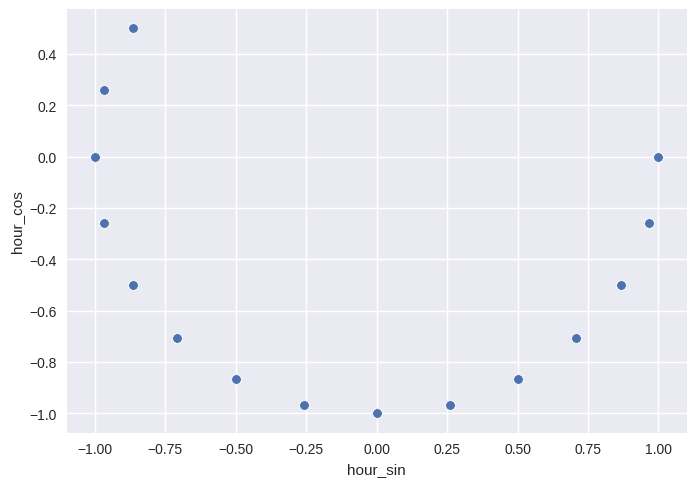

In [20]:
sns.scatterplot(data=df_dt, x='hour_sin', y='hour_cos')#.set_aspect('equal')
plt.show()

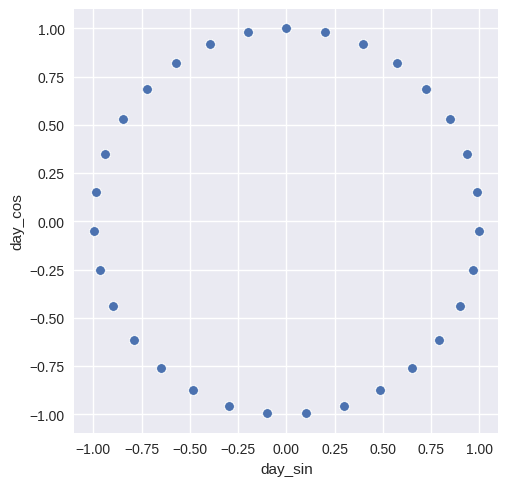

In [21]:
sns.scatterplot(data=df_dt, x='day_sin', y='day_cos').set_aspect('equal')
plt.show()

The chain breaking time is night, when shoping mall stay closed

### InvoiceNo 

Invoice number should not be encoded because those are the smallest clusters. Have to think about it.

In [22]:
a = pd.to_numeric(df['InvoiceNo'], errors='coerce')
df[a.isna()]['InvoiceNo'].unique()
print('# of non-numerical entry',a.isna().sum())

# of non-numerical entry 9291


In [23]:
x = [int(str(i).replace('C','').replace('A','')) for i in df.loc[:,"InvoiceNo"].to_numpy()]

In [24]:
df.loc[:,'InvoiceNo'] = df.apply(lambda Z: int(str(Z['InvoiceNo']).replace('C','').replace('A','')), axis=1)

In [25]:
df.dtypes

InvoiceNo        int64
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

That's surely a mistake, and correcting that we can get `InvoiceNo` as **int**

### Description

In [26]:
df['Description'].value_counts()#.sort_values(ascending=False).head(10).sum()/df.shape[0]

WHITE HANGING HEART T-LIGHT HOLDER     2369
REGENCY CAKESTAND 3 TIER               2200
JUMBO BAG RED RETROSPOT                2159
PARTY BUNTING                          1727
LUNCH BAG RED RETROSPOT                1638
                                       ... 
Missing                                   1
historic computer difference?....se       1
DUSTY PINK CHRISTMAS TREE 30CM            1
WRAP BLUE RUSSIAN FOLKART                 1
PINK BERTIE MOBILE PHONE CHARM            1
Name: Description, Length: 4223, dtype: int64

This part might have been redundunt and we have to check correlations, and we have to rely on stockCode, and encode that wisely such that no information is lost

## Correlation between customerID and other features

Correlation of two categorical variable: link [HERE](https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9)

Question: How to visualize relationship of two categorical variables

<AxesSubplot:xlabel='StockCode', ylabel='Description'>

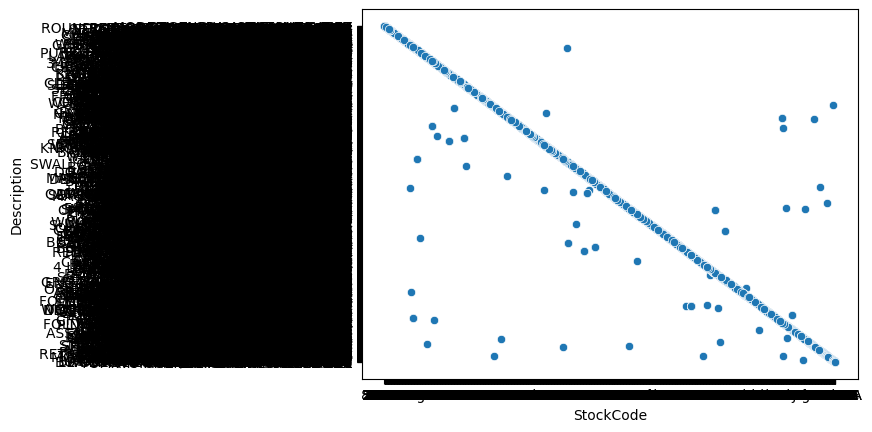

In [47]:
sns.scatterplot(data=df.sample(frac=0.01), x='StockCode', y='Description', )

Surely they are highly correlated but we have to find a good way to vsualize

<AxesSubplot:xlabel='StockCode', ylabel='UnitPrice'>

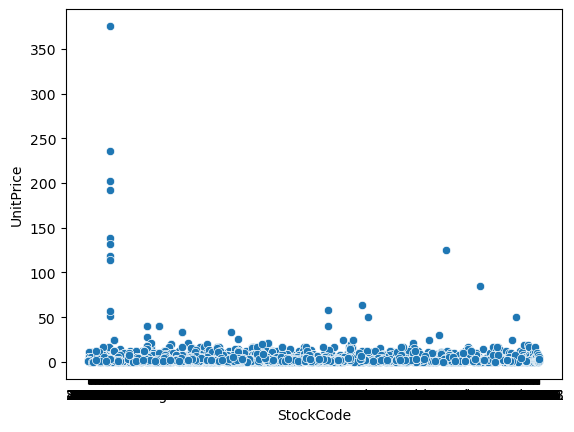

In [113]:
sns.scatterplot(data=df.sample(frac=0.01), x='StockCode', y='UnitPrice', )

/home/soumen/source/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/soumen/source/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:1718: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='CustomerID', ylabel='InvoiceNo'>

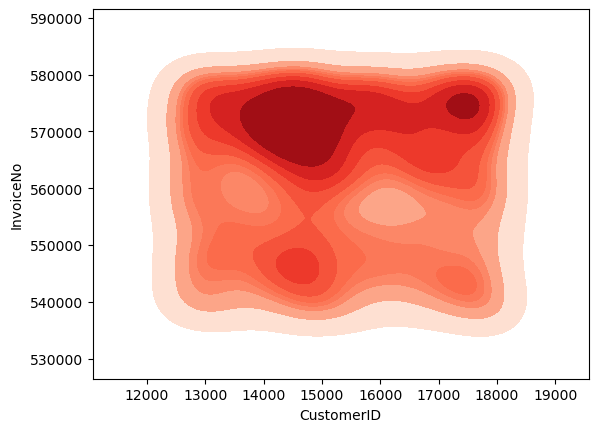

In [8]:
df_copy =  df[~df["CustomerID"].isna()].sample(frac=0.01).copy()

sns.kdeplot(df_copy["CustomerID"], 
            df_copy["InvoiceNo"],
            color='r', shade=True,
            cmap="Reds", shade_lowest=False)

Invoice no should be unique, but here I see it's not, several customerID with same Invoice no

In [16]:
df_copy =  df.copy()
df_copy.groupby(by=["CustomerID","InvoiceDate"], dropna=False)["InvoiceNo"].value_counts().head(20)

CustomerID  InvoiceDate       InvoiceNo
12346.0     18-01-2011 10:01  541431        1
            18-01-2011 10:17  541433        1
12347.0     2/8/2011 8:48     562032       22
            26-01-2011 14:30  542237       29
            31-10-2011 12:25  573511       47
            7/12/2010 14:57   537626       31
            7/12/2011 15:52   581180       11
            7/4/2011 10:43    549222       24
            9/6/2011 13:01    556201       18
12348.0     16-12-2010 19:09  539318       17
            25-01-2011 10:42  541998        6
            25-09-2011 13:13  568172        3
            5/4/2011 10:47    548955        5
12349.0     21-11-2011 09:51  577609       73
12350.0     2/2/2011 16:01    543037       17
12352.0     1/3/2011 14:57    545323        5
            1/3/2011 15:47    545329        2
            1/3/2011 15:49    545330        1
            1/3/2011 15:52    545332        3
            16-02-2011 12:33  544156       15
Name: InvoiceNo, dtype: int64

In [121]:
df.query('InvoiceNo==573585')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
430237,573585,11001,ASSTD DESIGN RACING CAR PEN,2,31-10-2011 14:41,3.29,NaN,United Kingdom
430238,573585,15036,ASSORTED COLOURS SILK FAN,15,31-10-2011 14:41,1.63,NaN,United Kingdom
430239,573585,15039,SANDALWOOD FAN,15,31-10-2011 14:41,1.63,NaN,United Kingdom
430240,573585,15056BL,EDWARDIAN PARASOL BLACK,1,31-10-2011 14:41,12.46,NaN,United Kingdom
430241,573585,15056N,EDWARDIAN PARASOL NATURAL,1,31-10-2011 14:41,12.46,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
431346,573585,90209C,PINK ENAMEL+GLASS HAIR COMB,3,31-10-2011 14:41,2.07,NaN,United Kingdom
431347,573585,90214S,"LETTER ""S"" BLING KEY RING",1,31-10-2011 14:41,0.83,NaN,United Kingdom
431348,573585,DOT,DOTCOM POSTAGE,1,31-10-2011 14:41,2019.05,NaN,United Kingdom
431349,573585,gift_0001_20,Dotcomgiftshop Gift Voucher �20.00,1,31-10-2011 14:41,16.67,NaN,United Kingdom


In [120]:
df['InvoiceNo'].value_counts()

573585    1114
581219     749
581492     731
580729     721
558475     705
          ... 
554023       1
554022       1
554021       1
554020       1
558901       1
Name: InvoiceNo, Length: 25900, dtype: int64

# Plan

## Feature planning (Mostly DONE)

* `InvoiceNo`: Made numeric (**Check whether it matches with other existing nos after removeing [CA]**), now okay
* `StockCode`   : Frequency encoding 
* `Description` : Redundunt (Stock Code is a better description)
* `Quantity`    : OK
*  `InvoiceDate` : Cyclic trasformation 
* `UnitPrice` : OK
* `CustomerID`: Lots of NaN, can it be redundunt? Invoice No can be a good predictor. But we can use Nan as diferent category who are not regular customer
* `Country`   : OHE

# Training 

## Feature engineering by pandas

In [2]:
df = pd.read_csv('Online_Retail.csv',parse_dates=['InvoiceDate'])

# InvoiceDate
df['hour'] = df.InvoiceDate.dt.hour
df['day'] = df.InvoiceDate.dt.day
df['month'] = df.InvoiceDate.dt.month
df['year'] = df.InvoiceDate.dt.year

def encode(data, col, max_val):
    data[col + '_sin'] = np.sin(2 * np.pi * data[col]/max_val)
    data[col + '_cos'] = np.cos(2 * np.pi * data[col]/max_val)
    return data.copy()

data = encode(df, 'month', 12)
data = encode(df, 'day', 31)
hour = encode(df, 'hour', 24)

df.drop(columns=['hour','month', 'day', 'InvoiceDate'], inplace=True)

# Description (Drop)
df.drop(columns=['Description'], inplace=True)

# frequency encoding for StockCode
mapping_dict  = df['StockCode'].value_counts().to_dict()
df['StockCode'] = df.apply(lambda z:mapping_dict[z['StockCode']], axis=1)

# Customer ID ( replace NAN with 190000)
df.loc[:,'CustomerID'] = df['CustomerID'].fillna(19000)


# Invoice number
df.loc[:,'InvoiceNo'] = df.apply(lambda Z: int(str(Z['InvoiceNo']).replace('C','').replace('A','')), axis=1)


# country
df = pd.get_dummies(df, columns=['Country'])


# Some random cuts (try to understand those latter)
df = df.query('UnitPrice < 10000 and Quantity > 0 and  Quantity < 10000 and UnitPrice>0 ').copy()

# they are so many, how they can have some clustering property, lets drop for simplicity
df.drop(columns=['CustomerID','InvoiceNo'], inplace=True)



In [21]:
#sns.pairplot(df.sample(frac=0.01))

In [128]:
#df.columns.tolist()
#df['CustomerID'].value_counts().to_dict()

## Feature engineering through pipeline

In [3]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


features = df.columns.tolist()
scale = [ 'StockCode', 'Quantity', 'UnitPrice','year',#'InvoiceNo', 'CustomerID',
 'month_sin', 'month_cos', 'day_sin', 'day_cos', 'hour_sin','hour_cos',]
kmeans = KMeans(n_clusters=3, random_state=0)


column_trans = make_column_transformer(
    (StandardScaler(), scale ),
    remainder='passthrough')

pipe = make_pipeline(column_trans,kmeans)

pipe.fit(df)
n_predict = pipe.predict(df)

In [4]:
features = df.columns.tolist()
pca = PCA(n_components = 4)

column_trans = make_column_transformer(
    (StandardScaler(), scale),
    remainder='passthrough')

pipe = make_pipeline(column_trans,pca)

X2D = pipe.fit_transform(df)

In [11]:
pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['StockCode', 'Quantity',
                                                   'UnitPrice', 'year',
                                                   'month_sin', 'month_cos',
                                                   'day_sin', 'day_cos',
                                                   'hour_sin', 'hour_cos'])])),
                ('pca', PCA(n_components=4))])

In [16]:
pd.DataFrame(pipe['pca'].components_,columns=features, index = ['PC-1','PC-2','PC-3','PC-4'])


,StockCode,Quantity,UnitPrice,year,month_sin,month_cos,day_sin,day_cos,hour_sin,hour_cos,...,Country_RSA,Country_Saudi Arabia,Country_Singapore,Country_Spain,Country_Sweden,Country_Switzerland,Country_USA,Country_United Arab Emirates,Country_United Kingdom,Country_Unspecified
PC-1,0.156352,0.135890,-0.018522,0.097411,-0.030972,-0.055092,-0.058004,0.111394,0.683662,-0.677754,...,0.000060,0.000014,0.000239,0.000706,0.000390,0.000856,-0.000179,-0.000085,-0.025774,-0.000260
PC-2,-0.043274,0.014223,0.003148,-0.634621,0.211131,0.067709,0.373821,-0.613250,0.130362,-0.114873,...,0.000052,-0.000005,-0.000041,-0.001324,0.000031,-0.000565,0.000040,0.000060,0.000258,-0.000426
PC-3,0.194779,0.104829,-0.000981,0.250052,0.456220,-0.694110,0.433430,0.053519,-0.023535,0.085590,...,-0.000064,-0.000007,0.000065,-0.000158,0.000234,0.000315,-0.000018,0.000036,-0.003200,0.000095
PC-4,-0.199657,-0.728585,0.621838,0.022191,0.071945,-0.082744,0.065693,0.071739,0.074181,-0.122074,...,-0.000006,0.000003,0.000463,-0.000059,-0.001099,-0.000220,-0.000085,-0.000029,0.013536,0.000019


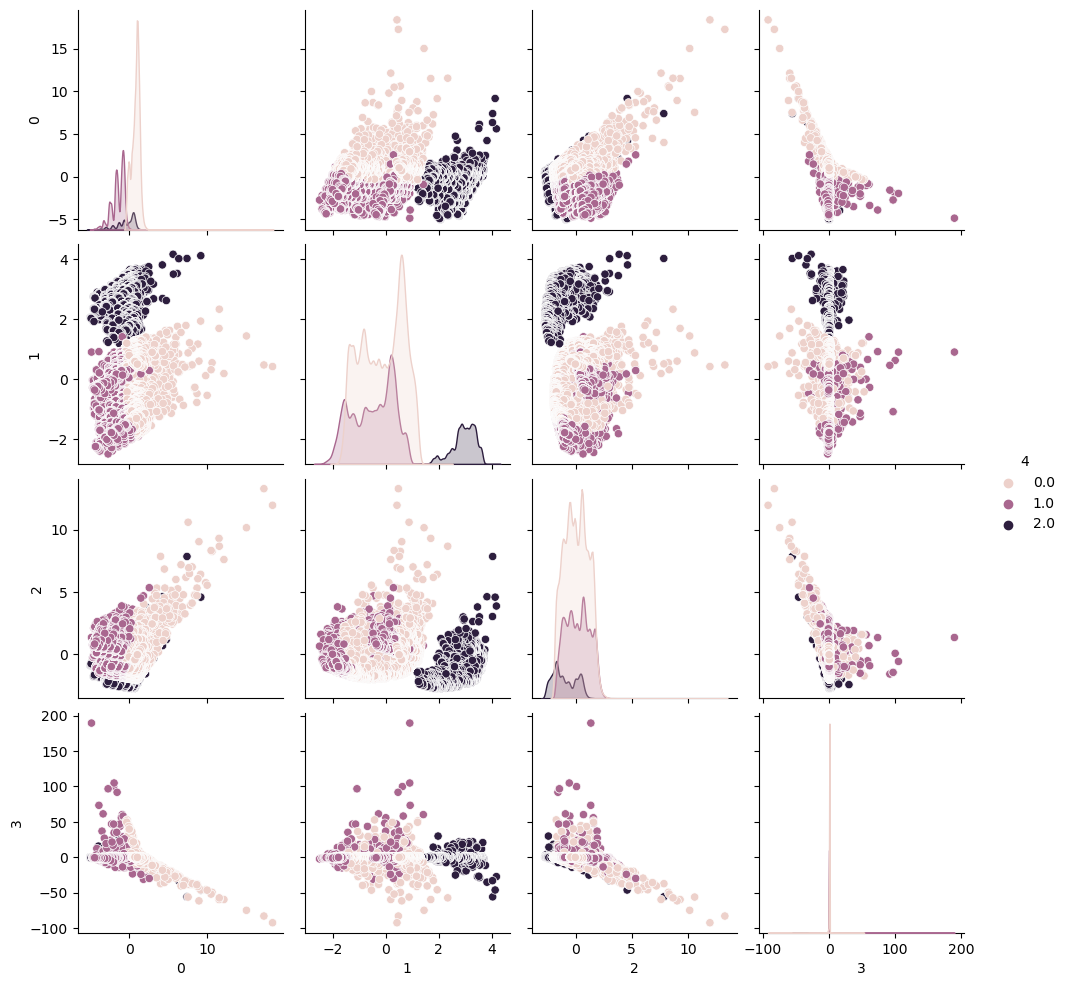

In [5]:
dataframe = pd.DataFrame(np.hstack([X2D,n_predict.reshape(n_predict.shape[0],1)]))
sns.pairplot(dataframe, hue=4)

# Insights?

In [6]:
df_vis = pd.read_csv('Online_Retail.csv',parse_dates=['InvoiceDate'])

df_vis = df_vis.query('UnitPrice < 10000 and Quantity > 0 and  Quantity < 10000 and UnitPrice>0 ').copy() 

df_vis.loc[:,'ncls']=n_predict

In [ ]:
sns.pairplot(df_vis,  hue='ncls')

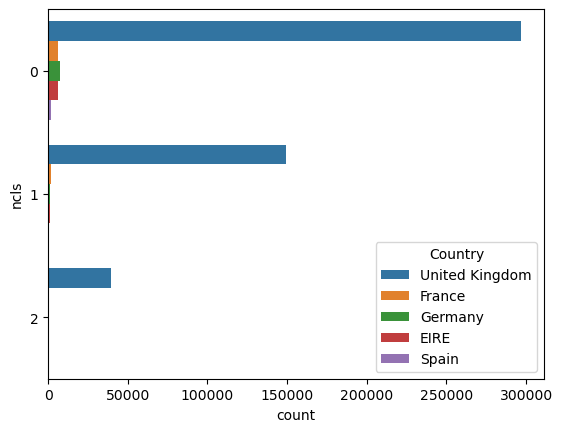

In [7]:
col = 'Country'
array_id = df_vis[col].value_counts().sort_values(ascending=False).head(5).index
sns.countplot(data=df_vis.loc[df_vis[col].isin(array_id), :],y='ncls', hue=col)
plt.show()

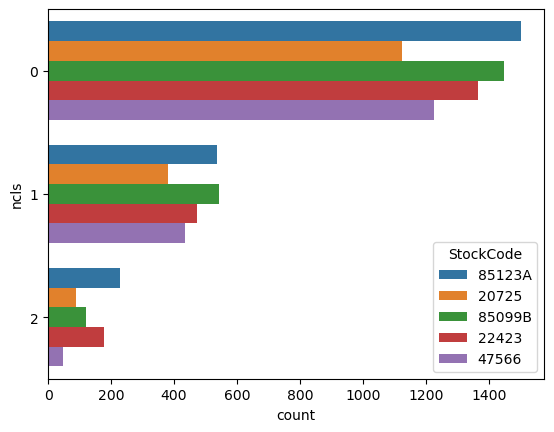

In [8]:
col = 'StockCode'
array_id = df_vis[col].value_counts().sort_values(ascending=False).head(5).index
sns.countplot(data=df_vis.loc[df_vis[col].isin(array_id), :],y='ncls', hue=col)
plt.show()

In [9]:
df1 = df.copy()
df1.loc[:,'ncls']=n_predict

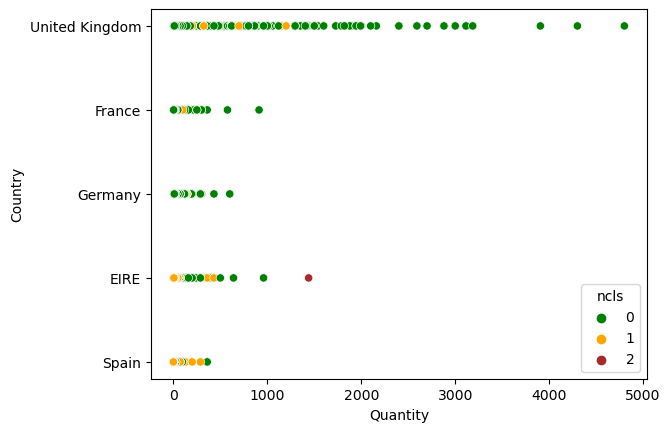

In [104]:
col = 'Country'
array_id = df_vis[col].value_counts().sort_values(ascending=False).head(5).index
sns.scatterplot(data=df_vis.loc[df_vis[col].isin(array_id), :],x='Quantity',y=col, hue='ncls',  palette=['green','orange','brown'],markers=['o', 'x', '^'])
plt.show()

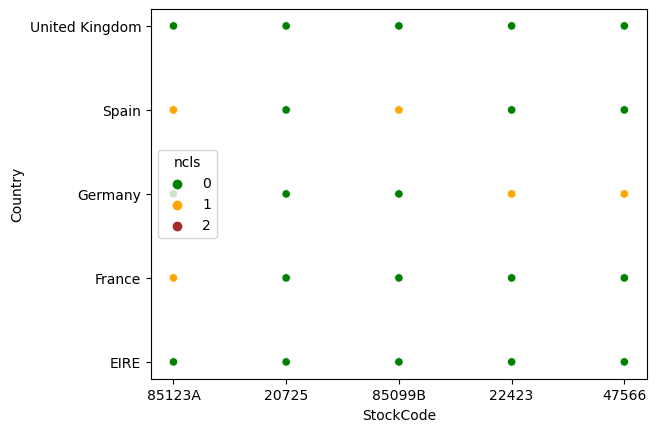

In [10]:
col1 = 'Country'
array_id1 = df_vis[col1].value_counts().sort_values(ascending=False).head(5).index

col2 = 'StockCode'
array_id2 = df_vis[col2].value_counts().sort_values(ascending=False).head(5).index


row  = df_vis[col1].isin(array_id1) &  df_vis[col2].isin(array_id2)
sns.scatterplot(data=df_vis.loc[row, :],x=col2,y=col1, hue='ncls',  palette=['green','orange','brown'],markers=['o', 'x', '^'])
plt.show()

# To do

* The discrete feature cannot be used in kMeans clustering, some flaw out there.  
   * Use [kModes](https://www.analyticsvidhya.com/blog/2021/06/kmodes-clustering-algorithm-for-categorical-data/#:~:text=It%20is%20basically%20a%20collection,used%20to%20cluster%20categorical%20variables.)
   * Explore other algorithms like Gaussian mixture,...
* Make cost function as function of ncluster
* plot each original feature, and try to see any real pattern you find or not
    * The clustering should be uniform across the InvoiceNo, CustomerID
    * There should be some pattern for month(Specific product on specific month/ time), contry...
    * Clearly there are some outliers (see PCA plot), need to remove them
* We need to do EDA more properly
    * Quantity is negetive (What's insight?)
    * UnitPrice > 10000 
* Need to understand what we are trying to achieve with this dataset? What market segment really is? 
* Check the kaggle notebook 